In this Jupyter notebook we have performed a hypothesis testing on a synthetic dataset to check if the difference between two machine learning algorithm Logistic Regression and Linear Discriminant Analysis is statistically sifnificant or not. We will use the library mlxtend. 

In [1]:
# compare logistic regression and lda for binary classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from matplotlib import pyplot



# Cross validation score 

LogisticRegression Mean Accuracy: 0.892 (0.036)
LinearDiscriminantAnalysis Mean Accuracy: 0.893 (0.033)


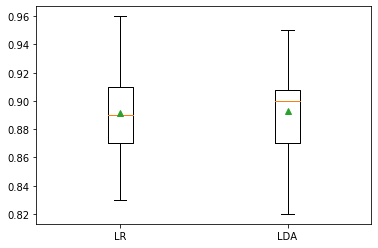

In [2]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
# evaluate model 1
model1 = LogisticRegression()
cv1 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores1 = cross_val_score(model1, X, y, scoring='accuracy', cv=cv1, n_jobs=-1)
print('LogisticRegression Mean Accuracy: %.3f (%.3f)' % (mean(scores1), std(scores1)))
# evaluate model 2
model2 = LinearDiscriminantAnalysis()
cv2 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores2 = cross_val_score(model2, X, y, scoring='accuracy', cv=cv2, n_jobs=-1)
print('LinearDiscriminantAnalysis Mean Accuracy: %.3f (%.3f)' % (mean(scores2), std(scores2)))
# plot the results
pyplot.boxplot([scores1, scores2], labels=['LR', 'LDA'], showmeans=True)
pyplot.show()

A box and whisker plot to show the distribution of accuracy scores from cross validation.



# 5×2 Procedure With MLxtend

In [3]:
# use 5x2 statistical hypothesis testing procedure to compare two machine learning algorithms
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from mlxtend.evaluate import paired_ttest_5x2cv


A hypothesis test to see if the observed results in the above Box plot are  are statistically significant or it's just a fluke.



In [4]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
# evaluate model 1
model1 = LogisticRegression()
cv1 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores1 = cross_val_score(model1, X, y, scoring='accuracy', cv=cv1, n_jobs=-1)
print('Mean Accuracy from Logistic Regression is: %.3f (%.3f)' % (mean(scores1), std(scores1)))
# evaluate model 2
model2 = LinearDiscriminantAnalysis()
cv2 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores2 = cross_val_score(model2, X, y, scoring='accuracy', cv=cv2, n_jobs=-1)
print('Mean Accuracy from LDA is : %.3f (%.3f)' % (mean(scores2), std(scores2)))
# check if difference between algorithms is real
t, p = paired_ttest_5x2cv(estimator1=model1, estimator2=model2, X=X, y=y, scoring='accuracy', random_seed=1)
# summarize
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))
# interpret the result
if p <= 0.05:
	print('Difference between mean performance is probably real')
else:
	print('Algorithms probably have the same performance')

Mean Accuracy from Logistic Regression is: 0.892 (0.036)
Mean Accuracy from LDA is : 0.893 (0.033)
P-value: 0.328, t-Statistic: 1.085
Algorithms probably have the same performance


In [5]:
# use 5x2 statistical hypothesis testing procedure to compare two machine learning algorithms
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from mlxtend.evaluate import paired_ttest_5x2cv
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
# evaluate model 1
model1 = LogisticRegression()
cv1 = RepeatedStratifiedKFold(n_splits=2, n_repeats=5, random_state=1)
scores1 = cross_val_score(model1, X, y, scoring='accuracy', cv=cv1, n_jobs=-1)
print('Mean Accuracy from Logistic Regression is : %.3f (%.3f)' % (mean(scores1), std(scores1)))
# evaluate model 2
model2 = LinearDiscriminantAnalysis()
cv2 = RepeatedStratifiedKFold(n_splits=2, n_repeats=5, random_state=1)
scores2 = cross_val_score(model2, X, y, scoring='accuracy', cv=cv2, n_jobs=-1)
print('Mean Accuracy from LDA is: %.3f (%.3f)' % (mean(scores2), std(scores2)))
# check if difference between algorithms is real
t, p = paired_ttest_5x2cv(estimator1=model1, estimator2=model2, X=X, y=y, scoring='accuracy', random_seed=1)
# summarize
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))
# interpret the result
if p <= 0.05:
	print('Difference between mean performance is probably real')
else:
	print('Algorithms probably have the same performance')

Mean Accuracy from Logistic Regression is : 0.894 (0.012)
Mean Accuracy from LDA is: 0.890 (0.013)
P-value: 0.328, t-Statistic: 1.085
Algorithms probably have the same performance
